Dataset: https://archive.ics.uci.edu/dataset/109/wine

In [18]:
!pip install pandas
!pip install matplotlib
!pip install ucimlrepo
!pip install graphviz
!pip install pydotplus
!pip install scikit-learn
!pip install --upgrade category_encoders

In [19]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Fetch dataset
wine = fetch_ucirepo(id=109)

# Data
X = wine.data.features  # Features
y = wine.data.targets  # Target variable

# Get a list of feature column names
feature_cols = list(X.columns.values)

# Verify the number of unique classes in the target variable
num_classes = len(np.unique(y))

# Define class names based on the number of unique classes
class_names = [str(i) for i in range(num_classes)]

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% training, 30% testing

# Create a Decision Tree classifier and fit it to the data (TRAIN DATA)
clf_dt = DecisionTreeClassifier(criterion="entropy")
clf_dt = clf_dt.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_dt = clf_dt.predict(X_test)

# Print Decision Tree accuracy
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))

# Calculate the Decision Tree confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print the Decision Tree confusion matrix
print(f"Decision Tree Confusion Matrix: \n{conf_matrix_dt}")

# Create an SVM classifier and fit it to the data (TRAIN DATA)
clf_svm = SVC(kernel="linear")
clf_svm = clf_svm.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = clf_svm.predict(X_test)

# Print SVM accuracy
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

# Calculate the SVM confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the SVM confusion matrix
print(f"SVM Confusion Matrix: \n{conf_matrix_svm}")

# Create a Random Forest classifier and fit it to the data (TRAIN DATA)
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = clf_rf.predict(X_test)

# Print Random Forest accuracy
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

# Calculate the Random Forest confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the Random Forest confusion matrix
print(f"Random Forest Confusion Matrix: \n{conf_matrix_rf}")


2023-11-04 17:37:22.630 
  command:

    streamlit run C:\Users\jarne\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


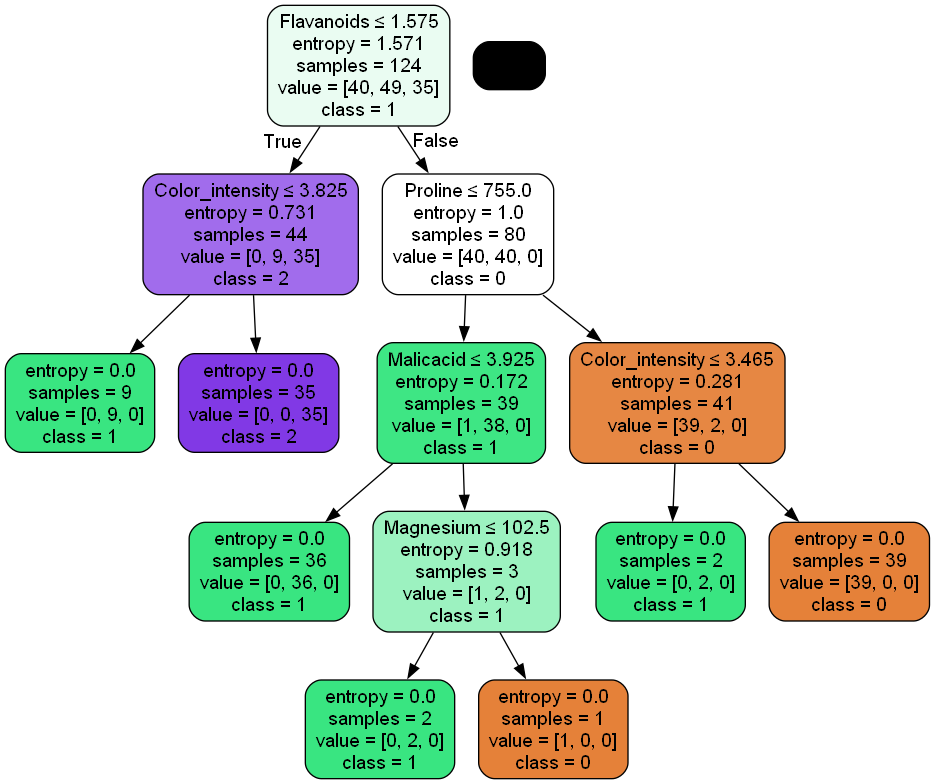

In [7]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 650)